# Working with images

Opening images

In [1]:
from skimage.io import imread

image = imread("blobs.tif")

Showing images

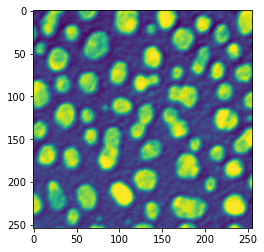

In [2]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()

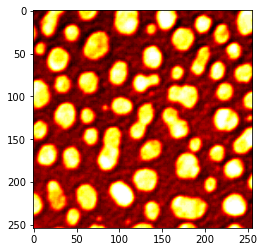

In [5]:
plt.imshow(image, cmap="hot")
plt.show()

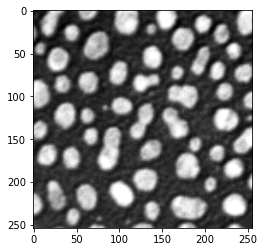

In [6]:
plt.imshow(image, cmap="gray")
plt.show()

# Filters

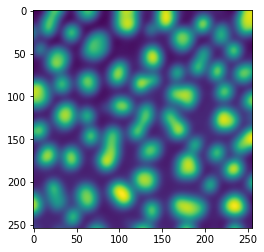

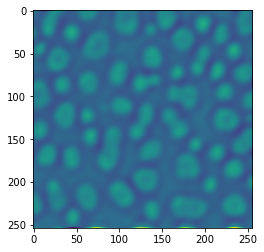

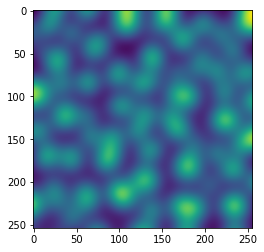

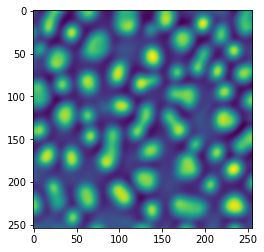

In [16]:
from skimage import filters

# Gaussian blur
gaussian_blurred_image = filters.gaussian(image, 5)
plt.imshow(gaussian_blurred_image)
plt.show()

# LoG
laplacian_of_gaussian = filters.laplace(gaussian_blurred_image)
plt.imshow(laplacian_of_gaussian)
plt.show()

# another Gaussian blur
gaussian_blurred_image_2 = filters.gaussian(image, 10)
plt.imshow(gaussian_blurred_image_2)
plt.show()

# DoG
difference_of_gaussian = gaussian_blurred_image - gaussian_blurred_image_2
plt.imshow(difference_of_gaussian)
plt.show()



Some images ask for a structuring element "selem", for example "disc" with a given radius:

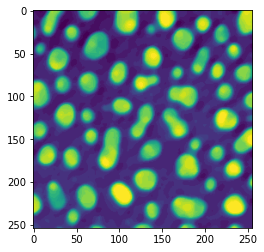

In [44]:
from skimage.morphology import disk

median_filtered = filters.median(image, disk(5))
plt.imshow(median_filtered)
plt.show()

The threshold_otsu operation delivers a number - the threshold to be applied

In [29]:
from skimage import filters

threshold = filters.threshold_otsu(blurred_image)
print(threshold)

0.48307635389561887


Using numpy arrays, we can apply the threshold by applying the >= operato

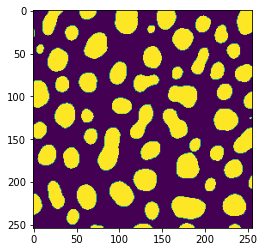

In [30]:
thresholded_image = blurred_image >= threshold

plt.imshow(thresholded_image)
plt.show()

Postprocessing operations, to refine binary masks, can be found in the morphology package

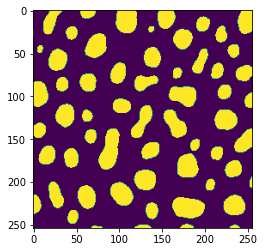

In [31]:
from skimage import morphology

eroded_binary_image = morphology.binary_erosion(thresholded_image)

plt.imshow(eroded_binary_image)
plt.show()

# Connected components analysis

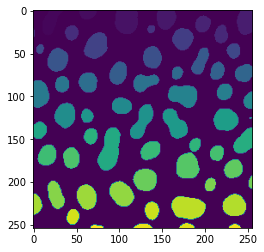

In [32]:
from skimage import measure

# run connected components analysis
label_image = measure.label(thresholded_image)

plt.imshow(label_image)
plt.show()

# Feature extraction
To read out properties from regions, we use the regionprops_table function:

In [45]:
from skimage import measure

# analyse objects
table = measure.regionprops_table(label_image)

# show table
table

{'label': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),
 'bbox-0': array([  0,   0,   0,   0,   0,   6,  17,  18,  18,  21,  21,  26,  39,
         40,  42,  44,  44,  60,  60,  63,  66,  73,  75,  77,  82,  86,
         88,  95, 102, 108, 110, 115, 115, 115, 125, 130, 137, 137, 138,
        149, 153, 157, 158, 160, 166, 174, 185, 193, 195, 199, 199, 203,
        214, 214, 217, 223, 232, 248, 249, 249, 250]),
 'bbox-1': array([ 11,  53,  95, 144, 237, 189, 211,  37, 133,   0, 162,  59, 225,
          4, 128,  17, 184,  89, 206, 235, 162,  53, 117,  26,   0, 214,
        157, 245,  92,  25, 113,  56, 151, 210, 252,   0,  75, 233,  59,
        182, 125,   5, 206,  35, 167, 222, 116, 251, 200,  17,  89,  51,
          0, 220, 161, 130,  39, 170, 117, 228,  67]),

In [46]:
from skimage import measure

# analyse objects
table = measure.regionprops_table(label_image, properties=('area', 
                                                           'centroid',
                                                           'orientation',
                                                           'major_axis_length',
                                                           'minor_axis_length'))

# show table
table


{'area': array([422, 182, 661, 437, 476, 277, 259, 219,  67,  19, 486, 630, 221,
         78, 449, 516, 390, 419, 267, 353, 151, 400, 426, 246, 503, 278,
        681, 176, 358, 544, 597, 181, 629, 596,   5, 263, 899, 476, 233,
        164, 394, 411, 235, 375, 654, 376, 579,  64, 161, 457, 625, 535,
        205, 562, 845, 280, 211,  78,  86,  51,  46]),
 'centroid-0': array([ 13.03080569,   4.25274725,  12.54462935,   9.82608696,
         13.48739496,  15.82310469,  27.9034749 ,  26.10502283,
         21.80597015,  26.21052632,  33.19753086,  41.38412698,
         47.04977376,  45.        ,  54.77060134,  57.73062016,
         59.54358974,  73.20286396,  70.61797753,  73.04532578,
         72.86754967,  83.8875    ,  83.69953052,  86.01626016,
         97.43737575,  94.92805755,  99.08957416, 105.17613636,
        111.29329609, 122.20772059, 129.75041876, 122.86187845,
        132.25596184, 127.43624161, 125.4       , 139.64638783,
        162.42157953, 153.10714286, 146.58798283, 156.5

We can access this table like a dictionary containing arrays, e.g. to derive the mean of the colum "area":

In [48]:
from skimage import measure
import numpy as np

# analyse objects
table = measure.regionprops_table(label_image, properties=('area',))

# measure mean area
np.mean(table['area'])

358.42622950819674